<a href="https://colab.research.google.com/github/jchen8000/MLDLwithPython/blob/main/4_05_Principal_Component_Analysis/PCA_Introduction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Principal Component Analysis (PCA) Introduction

In [ ]:
%pip install \
  numpy==2.0.2 \
  scikit-learn==1.6.1 \
  matplotlib==3.10.0

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import decomposition
from sklearn import datasets
from sklearn import preprocessing


## PCA to Transform 2D data to 1D

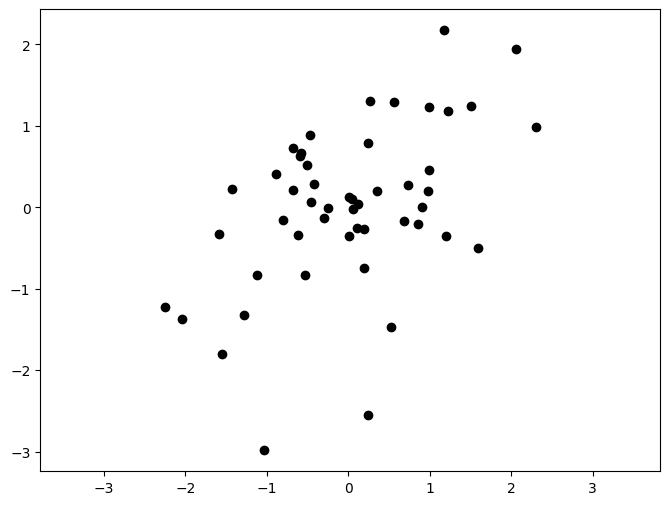

In [2]:
# Generate sample data
mean = np.array([0, 0])
cov = np.array([[3, 1.8], [1.8, 6]])
np.random.seed(8)
X = np.random.multivariate_normal(mean, cov, size=50)
scaler = preprocessing.StandardScaler()
X = scaler.fit_transform(X)

plt.figure(1, figsize=(8,6))
plt.scatter(X[:, 0], X[:, 1], c='k')
plt.axis('equal')
plt.show() 

pca = decomposition.PCA(1)
X_pca = pca.fit_transform(X)
X_reverse = pca.inverse_transform(X_pca) 

Components_:
 [[-0.7071 -0.7071]]
PCA Mean:
 [ 0. -0.]
Explained variance ratio:
 [0.7493]


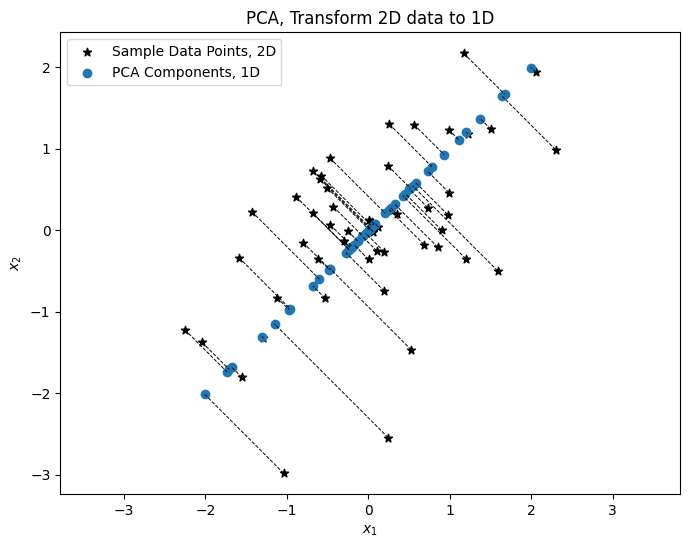

In [3]:
pca = decomposition.PCA(n_components=1)
X_pca = pca.fit_transform(X)
X_reverse = pca.inverse_transform(X_pca) 

np.set_printoptions(suppress=True, precision=4)
print("Components_:\n", pca.components_)
print("PCA Mean:\n", pca.mean_)
print("Explained variance ratio:\n", 
                pca.explained_variance_ratio_ )

plt.figure(1, figsize=(8,6))
plt.scatter(X[:, 0], X[:, 1], c='k', marker='*', label='Sample Data Points, 2D')
plt.scatter(X_reverse[:, 0], X_reverse[:, 1], label='PCA Components, 1D', c='tab:blue')
[plt.plot([X[i, 0], X_reverse[i, 0]], [X[i, 1], X_reverse[i, 1]], c='k', linestyle='--', linewidth=0.7 ) for i in range(X.shape[0])]
plt.axis('equal')
plt.xlabel(r'$x_1$')
plt.ylabel(r'$x_2$')
plt.title('PCA, Transform 2D data to 1D')
plt.legend(loc='best')
plt.savefig("pca_introduction_1.svg", format="svg", transparent=True, bbox_inches='tight')
plt.show()

## PCA to Transform 2D data to 2D

Generate sample data:

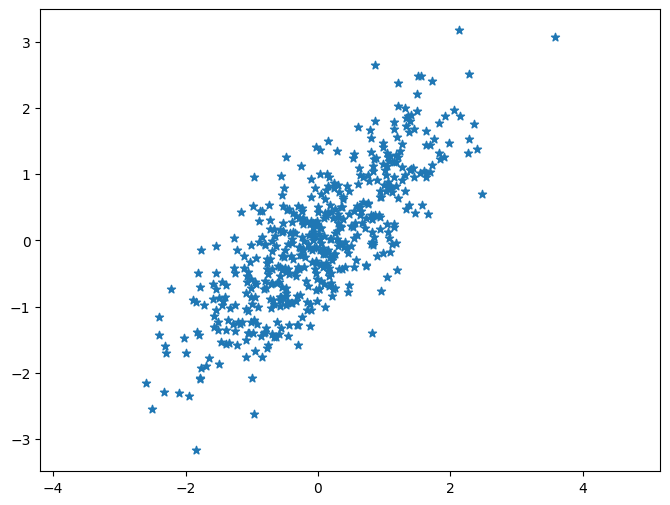

In [4]:
# Generate sample data
mean = np.array([0, 0])
cov = np.array([[3, 3.2], [3.2, 6]])
np.random.seed(8)
X1 = np.random.multivariate_normal(mean, cov, size=500)
scaler = preprocessing.StandardScaler()
X1 = scaler.fit_transform(X1)

plt.figure(1, figsize=(8,6))
plt.scatter(X1[:, 0], X1[:, 1], marker='*', c='tab:blue')
plt.axis('equal')
plt.show()                                

Apply PCA:

In [5]:
pca1 = decomposition.PCA(n_components=2)
pca1.fit(X1)
print("Components_:\n", pca1.components_)
print("PCA Mean:\n", pca1.mean_)
print("Explained variance ratio:\n", pca1.explained_variance_ratio_ )

Components_:
 [[ 0.7071  0.7071]
 [ 0.7071 -0.7071]]
PCA Mean:
 [-0.  0.]
Explained variance ratio:
 [0.8918 0.1082]


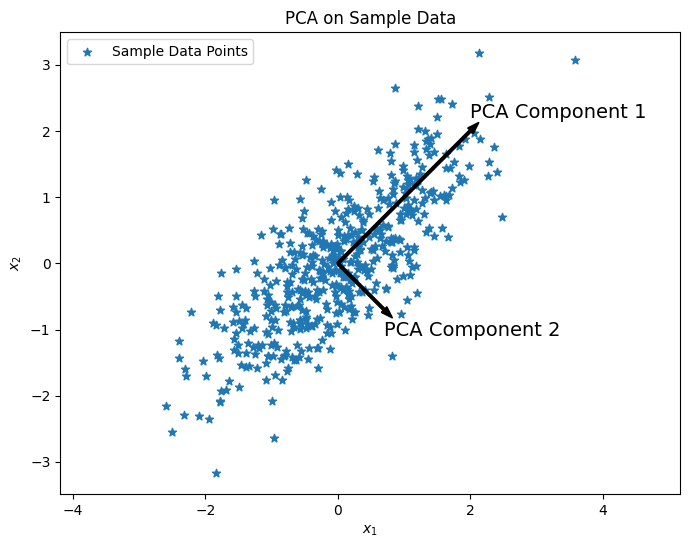

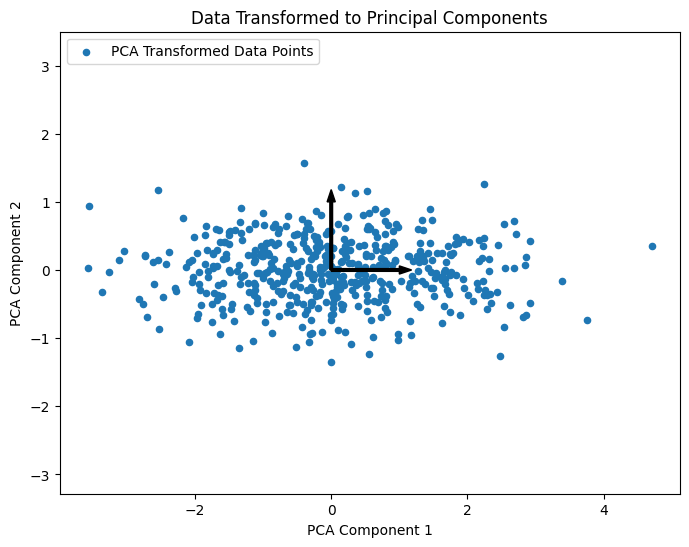

In [6]:
plt.figure(1, figsize=(8,6))
plt.scatter(X1[:, 0], X1[:, 1], c='tab:blue', marker='*', label='Sample Data Points')
v = pca1.components_[0] * np.sqrt(pca1.explained_variance_ratio_[0]) * 3
u = pca1.components_[1] * np.sqrt(pca1.explained_variance_ratio_[1]) * 3
plt.arrow(0, 0, v[0], v[1], width=0.04, color='k')
plt.arrow(0, 0, u[0], u[1], width=0.04, color='k')
plt.text(u[0], u[1]-0.4,'PCA Component 2', fontsize=14, color='k')
plt.text(v[0], v[1]+0.2,'PCA Component 1', fontsize=14, color='k')
plt.axis('equal')
plt.xlabel(r'$x_1$')
plt.ylabel(r'$x_2$')
plt.title('PCA on Sample Data')
plt.legend(loc='upper left')
plt.savefig("pca_introduction_2.svg", format="svg", transparent=True, bbox_inches='tight')
plt.show()

X_pca1 = pca1.transform(X1)
plt.figure(1, figsize=(8,6))
plt.scatter(X_pca1[:, 0], X_pca1[:, 1], c='tab:blue', marker='o', s=20, label='PCA Transformed Data Points')
plt.arrow(0, 0, 0, 1, width=0.04, color='k')
plt.arrow(0, 0, 1, 0, width=0.04, color='k')
plt.axis('equal')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.title('Data Transformed to Principal Components')
plt.legend(loc='upper left')
plt.savefig("pca_introduction_3.svg", format="svg", transparent=True, bbox_inches='tight')
plt.show()

## PCA, Breast Cancer Dataset

In [7]:
data = datasets.load_breast_cancer()
scaler = preprocessing.StandardScaler()
X2 = scaler.fit_transform(data.data) 
y2 = data.target

pca2 = decomposition.PCA(n_components=2)
pca2.fit(X2)

print("Number of components:", pca2.n_components_)
print("Explained variance ratio:\n", pca2.explained_variance_ratio_ )
print("Explained variance:\n", pca2.explained_variance_ )
print("PCA Mean:\n", pca2.mean_)
print("Components_:\n", pca2.components_)

Number of components: 2
Explained variance ratio:
 [0.4427 0.1897]
Explained variance:
 [13.305   5.7014]
PCA Mean:
 [-0. -0. -0. -0.  0. -0. -0.  0. -0. -0. -0. -0.  0. -0. -0. -0.  0. -0.
 -0. -0. -0.  0. -0.  0. -0. -0.  0. -0. -0.  0.]
Components_:
 [[ 0.2189  0.1037  0.2275  0.221   0.1426  0.2393  0.2584  0.2609  0.1382
   0.0644  0.206   0.0174  0.2113  0.2029  0.0145  0.1704  0.1536  0.1834
   0.0425  0.1026  0.228   0.1045  0.2366  0.2249  0.128   0.2101  0.2288
   0.2509  0.1229  0.1318]
 [-0.2339 -0.0597 -0.2152 -0.2311  0.1861  0.1519  0.0602 -0.0348  0.1903
   0.3666 -0.1056  0.09   -0.0895 -0.1523  0.2044  0.2327  0.1972  0.1303
   0.1838  0.2801 -0.2199 -0.0455 -0.1999 -0.2194  0.1723  0.1436  0.098
  -0.0083  0.1419  0.2753]]


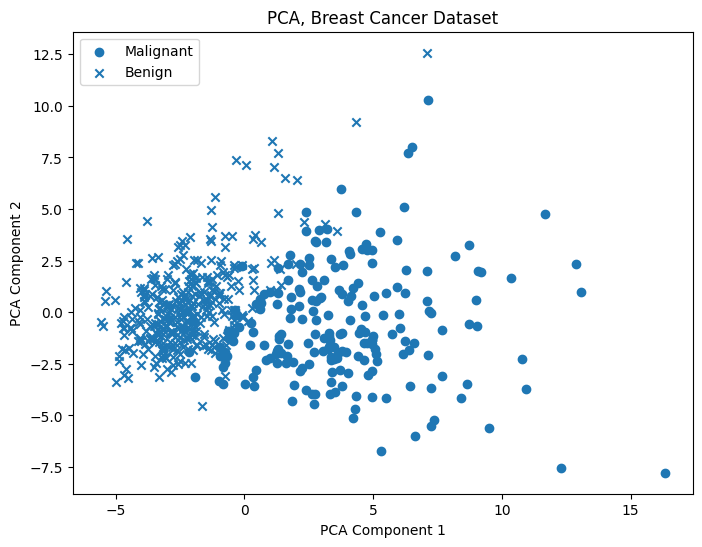

In [ ]:
X_pca2 = pca2.transform(X2)
fig = plt.figure(figsize=(8,6))
# colors = {0: 'navy', 1: 'black'}
colors = {0: 'tab:blue', 1: 'tab:blue'}
markers = {0:'o', 1: 'x'}
labels = ['Malignant', 'Benign']

for g in np.unique(y2):
    ix = np.where(y2 == g)
    plt.scatter(X_pca2[ix,0], X_pca2[ix,1], c = colors[g], marker = markers[g], label = labels[g])
# plt.axis('equal')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.title('PCA, Breast Cancer Dataset')
plt.legend(loc='upper left')
plt.savefig("pca_introduction_4.svg", format="svg", transparent=True, bbox_inches='tight')
plt.show()

## Select the Number of Components

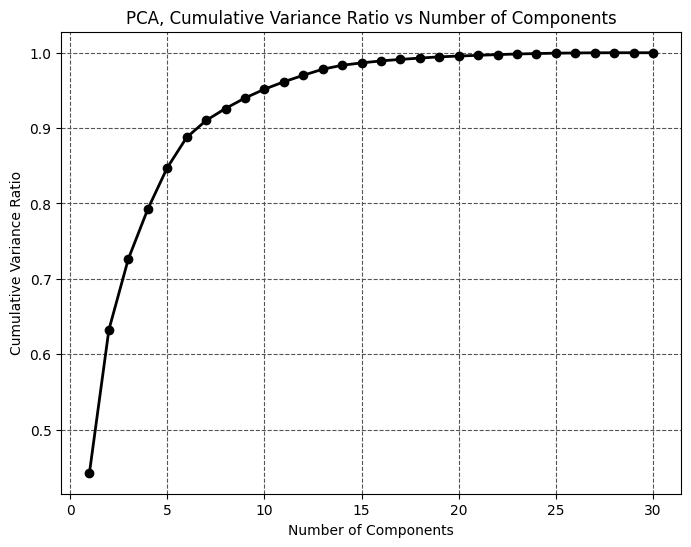

In [9]:
pca3 = decomposition.PCA()
pca3.fit(X2)

n = np.arange(1, pca3.explained_variance_ratio_.shape[0]+1)
r = np.cumsum(pca3.explained_variance_ratio_)

fig = plt.figure(figsize=(8,6))
plt.plot(n, r, marker='o', color='k', lw=2)
plt.grid(which='major', color='#555555', linestyle='--')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Variance Ratio')
plt.title('PCA, Cumulative Variance Ratio vs Number of Components')
plt.savefig("pca_introduction_5.svg", format="svg", transparent=True, bbox_inches='tight')
plt.show()

Set explained variance to 90%.

In [10]:
pca4 = decomposition.PCA(n_components=0.9)
pca4.fit(X2)

print("Number of components:", pca4.n_components_)
print("Explained variance ratio:\n", pca4.explained_variance_ratio_ )
print("Explained variance:\n", pca4.explained_variance_ )
print("PCA Mean:\n", pca4.mean_)
print("Components_:\n", pca4.components_)

Number of components: 7
Explained variance ratio:
 [0.4427 0.1897 0.0939 0.066  0.055  0.0402 0.0225]
Explained variance:
 [13.305   5.7014  2.8229  1.9841  1.6516  1.2095  0.6764]
PCA Mean:
 [-0. -0. -0. -0.  0. -0. -0.  0. -0. -0. -0. -0.  0. -0. -0. -0.  0. -0.
 -0. -0. -0.  0. -0.  0. -0. -0.  0. -0. -0.  0.]
Components_:
 [[ 0.2189  0.1037  0.2275  0.221   0.1426  0.2393  0.2584  0.2609  0.1382
   0.0644  0.206   0.0174  0.2113  0.2029  0.0145  0.1704  0.1536  0.1834
   0.0425  0.1026  0.228   0.1045  0.2366  0.2249  0.128   0.2101  0.2288
   0.2509  0.1229  0.1318]
 [-0.2339 -0.0597 -0.2152 -0.2311  0.1861  0.1519  0.0602 -0.0348  0.1903
   0.3666 -0.1056  0.09   -0.0895 -0.1523  0.2044  0.2327  0.1972  0.1303
   0.1838  0.2801 -0.2199 -0.0455 -0.1999 -0.2194  0.1723  0.1436  0.098
  -0.0083  0.1419  0.2753]
 [-0.0085  0.0645 -0.0093  0.0287 -0.1043 -0.0741  0.0027 -0.0256 -0.0402
  -0.0226  0.2685  0.3746  0.2666  0.216   0.3088  0.1548  0.1765  0.2247
   0.2886  0.2115 -0.0475 